# Robots Part 1
# Implementation

## 0. Import Statements and Variable Declarations

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import numpy as np

# Your Robot
R1 = 1
R1_v0 = 1
R1_x0 = 0
R1_y0 = 12

# Their Robot
R2 = 2
R2_v0 = 3
R2_x0 = 20
R2_y0 = 6

## 1. First, we will create a method to get each robot's coordinates.

In [2]:
# code = which calculation to use (1 for my robot, 2 for their robot)
def get_coords(v0, x0, y0, t, code):
    if code == 1:
        x = x0 + (v0 * t)
        y = y0 + (-0.5 * v0 * t)
    elif code == 2:
        x = x0 - (0.8 * v0 * t)
        y = y0 - (-0.05 * v0 * t**2)
        
    return x, y

## 2. Then, we will calculate the coordinates for the first 10 seconds. 

In [3]:
NUM_STEPS = 100
time = np.linspace(0, NUM_STEPS/10, NUM_STEPS)

R1_x, R1_y = get_coords(R1_v0, R1_x0, R1_y0, time, R1)
R2_x, R2_y = get_coords(R2_v0, R2_x0, R2_y0, time, R2)

## 3. Then, we will plot these trajectories and the playing field.

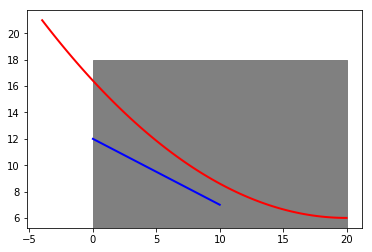

In [4]:
figs, ax = plt.subplots()

ax.plot(R1_x, R1_y, color = "blue", lw = 2)
ax.plot(R2_x, R2_y, color = "red", lw = 2)

rect = patch.Rectangle((0,0), 20, 18)
rect.set_color("gray")
ax.add_patch(rect)

## 4. Then, we will need to calculate the intended trajectories for each robot.

In [5]:
def ideal_trajectory(v0, x0, y0, t, code):
    if code == 1:
        x = x0 + (v0 * t)
        y = y0
    elif code == 2:
        x = x0 - (v0 * t)
        y = y0  

    return x, y

R1_ix, R1_iy = ideal_trajectory(R1_v0, R1_x0, R1_y0, 10, R1)
R2_ix, R2_iy = ideal_trajectory(R2_v0, R2_x0, R2_y0, 10, R2)

## 5. Now, we will calculate the distance between the actual and intended trajectories for each robot.

In [6]:
def distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2) 

R1_deviation = distance(R1_ix, R1_iy, R1_x[-1], R1_y[-1])
R2_deviation = distance(R2_ix, R2_iy, R2_x[-1], R2_y[-1])
print("Number of Feet Off-Course:")
print("    Robot 1: {:.2f} ft".format(R1_deviation))
print("    Robot 2: {:.2f} ft".format(R2_deviation))

Number of Feet Off-Course:
    Robot 1: 5.00 ft
    Robot 2: 16.16 ft


## 6. Finally, we calculate how far the robots strayed away from each other.

In [7]:
actual_distance_apart = distance(R1_x[-1], R1_y[-1], R2_x[-1], R2_y[-1])
expected_distance_apart = distance(R1_ix, R1_iy, R2_ix, R2_iy)

print("Expected distance apart: ", expected_distance_apart)
print("Actual distance apart: ", actual_distance_apart)
print("{:.4f} additional ft apart".format(expected_distance_apart - actual_distance_apart))

Expected distance apart:  20.8806130178211
Actual distance apart:  19.798989873223334
1.0816 additional ft apart


# Answers

## 1. Will any of the robots hit a wall on the playing field? If so, at what location?

Yes. According to the graph created in step 3, Robot 2 (Red) clearly leaves the playing field at the approximate location (0, 16.5). Robot 1 (Blue) starts on the edge of the playing field, but never actually leaves, so we won't count this as an instance of leaving the playing field.

## 2. Do the robot paths intersect and if so, at what location on the playing field do they intersect at?

No. According to the graph created in step 3, the paths of these two robots will never intersect.

## 3. Will the robots collide with each other or will they not collide? If they collide, at what time will the collide in seconds?

No, they will not collide. Because the paths of these robots never intersect, we know for a fact that there will also be no point within these 10 seconds that the robots will collide.

## 4. Which robot veered the furthest from their straight path they were supposed to take? What distance apart are the robots after 10 seconds from there they were supposed to be?

As we can see in step 5, Robot 2 veered the furtherest from its path, at 16.16 ft compared to Robot 1's 5.00 ft. If the robots had not veered off course, we would have expected them to be around 20.88 ft apart at 10 seconds. In reality, we saw them being around 19.80 ft apart. This means that, at 10 seconds, the robots were 1.08 ft closer than they should have been. These calculations were completed in step 6.